In [1]:
import pandas as pd
import collections
import json ## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud ## for text processing
import re
import nltk ## for language detection
import langdetect ## for sentiment
from textblob import TextBlob## for ner
import spacy ## for vectorizer
from sklearn import feature_extraction, manifold ## for word embedding
import gensim.downloader as gensim_api ## for topic modeling
import gensim

In [2]:
lst_dics = []
with open('data.json', mode='r', errors='ignore') as json_file:
    for dic in json_file:
        lst_dics.append( json.loads(dic) )## print the first one      
lst_dics[0]

{'category': 'CRIME',
 'headline': 'There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV',
 'authors': 'Melissa Jeltsen',
 'link': 'https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89',
 'short_description': 'She left her husband. He killed their children. Just another day in America.',
 'date': '2018-05-26'}

In [3]:
## create dtf
dtf = pd.DataFrame(lst_dics)## filter categories
dtf = dtf[ dtf["category"].isin(['ENTERTAINMENT','POLITICS','TECH']) ][["category","headline"]]## rename columns
dtf = dtf.rename(columns={"category":"y", "headline":"text"})## print 5 random rows
dtf.sample(5)

,y,text
54163,POLITICS,Wednesday's Morning Email: UK's Chilcot Report...
37179,POLITICS,"Mark Hamill Is Back As Trump The Joker, Readin..."
79752,POLITICS,Huckabee: Obama Nominated Openly Gay Army Head...
19258,POLITICS,Trump Says He's 'Doing The Military A Great Fa...
58958,POLITICS,Congress Backs Arlington Burial Honor For Fema...


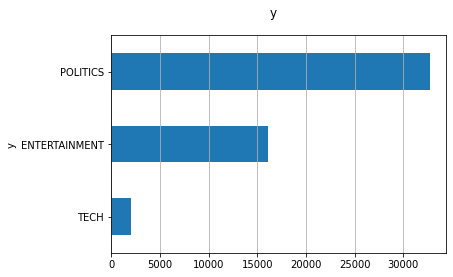

In [4]:
x = "y" 

fig, ax = plt.subplots()
fig.suptitle(x, fontsize=12)
dtf[x].reset_index().groupby(x).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [5]:
txt = dtf["text"].iloc[0]

print(txt, " --> ", langdetect.detect(txt))

Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song  -->  en


In [ ]:
dtf['lang'] = dtf["text"].apply(lambda x: langdetect.detect(x) if 
                                 x.strip() != "" else "")

dtf.head()